# Classification

# **MNIST**

MNIST dataset , which is a set of 70000 small images of digits handwritten by high school students and employees, each images is labeled with the digit it represents.

In [1]:
#Download the dataset

from sklearn.datasets import fetch_openml

mnist=fetch_openml('mnist_784', as_frame=False)


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [2]:
#as images cannot fit in Frame, so use as_frame=False

X, y = mnist.data, mnist.target

X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [3]:
X.shape

(70000, 784)

In [4]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [5]:
y.shape

(70000,)

There are 70000 images and each image has 784 features. each image is 28 X 28 pixels. each feature represent one pixal's intensity, from 0 to 255 .reshape it to a 28 X 28 array and display it using Matplotlib's `imshow()` function.

We use `cmap="primary"` to get a grayscale color where 0 is white and 255 is black.

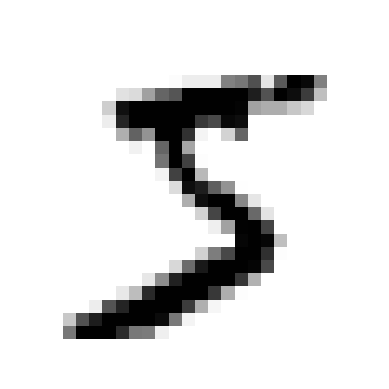

In [6]:
import matplotlib.pyplot as plt

def plot_digit(image_data):
  image = image_data.reshape(28, 28)
  plt.imshow(image, cmap="binary")
  plt.axis("off")

some_digit=X[0]
plot_digit(some_digit)
plt.show()

In [7]:
y[0]

'5'

In [8]:
X_train, X_test,y_train, y_test=X[:60000], X[60000:], y[:60000], y[60000:]

## Training a Binary Classifier

In [9]:
y_train_5=(y_train=='5') #true for all 5s, false for all other digits

y_test_5=(y_test=='5')

stochastic gradient descent (SGD , or stochastic GD) classifier.

Scikit-Learn library: `SGDClassifier`

This classifier is capable of handling very large datasets effeciently.

In [10]:
from sklearn.linear_model import SGDClassifier

sgd_clf= SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

Now above model can be used to detect images of the number 5

In [11]:
sgd_clf.predict([some_digit])

array([ True])

So in above prediction the model predicted the passed image is of 5.

## Performance Measures

### Measuring Accuracy Using Cross-Validation

To evaluate a model use cross-validation, use the `cross_val_score()`

In [12]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [13]:
from sklearn.dummy import DummyClassifier

dummy_clf= DummyClassifier()
dummy_clf.fit(X_train,y_train_5)
print(any(dummy_clf.predict(X_train))) #print False for no 5s detected

False


In [14]:
#Find model accuracy

cross_val_score(dummy_clf,X_train,y_train_5, cv=3, scoring="accuracy")

array([0.90965, 0.90965, 0.90965])

in above accuracy check there are 90% time when classifier finds the passed input is not 5, and there are about 10% of the images are 5.

Accuracy is not correct way to measure performance for classifier, especially when dealing with skewed dataset(i.e. when some classes are much more frequent then others.

Better way to use confusion matrix(CM) to evaluate the performance



StratifiedKFold class performs stratified sampling , here count of split is 3 and each iteration the code creates a clone of the classifier, train that clone on the training folds.

In [15]:
#to get more control over cross-validation process then what Scikit-Learn provides , can implement own cross-validation.

from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone


skfolds=StratifiedKFold(n_splits=3) #add shuffle=True if the dataset is not already suffled.

for train_index, test_index in skfolds.split(X_train, y_train_5):
  clone_clf=clone(sgd_clf)
  X_train_folds= X_train[train_index]
  y_train_folds=y_train_5[train_index]
  X_test_fold=X_train[test_index]
  y_test_fold=y_train_5[test_index]

  clone_clf.fit(X_train_folds,y_train_folds)
  y_pred=clone_clf.predict(X_test_fold)
  n_correct= sum(y_pred==y_test_fold)
  print(n_correct /len(y_pred))



0.95035
0.96035
0.9604


### Confusion Matrices

this needs a set of predictions.

NOTE: Do not use Test set for now, test set will be used at the end of the project, instead can use cross_val_predict()

Just line `cross_val_score()` function `cross_val_predict()` performs k-fold cross-validation, but instead of returning scores, it returns the predictions made on each test fold.

It helps to get clean prediction for each instance in the training set, and the model makes the prediction on data that it never saw during training.

In [16]:
from sklearn.model_selection import cross_val_predict

y_train_pred= cross_val_predict(sgd_clf, X_train,y_train_5,cv=3)

In [17]:
#Get Confusion matrix

from sklearn.metrics import confusion_matrix

cm= confusion_matrix(y_train_5, y_train_pred)

In [18]:
cm

array([[53892,   687],
       [ 1891,  3530]])

each row in confusion matrix represent an actual class, while each column represent a predicted class.

The first row of the matrix considers non-5 images(the negative class) 53892 of them where correctly classified as non-5s (they are called true -ve) while the remaining 687 were wrongly classified as 5s (false +ve classes : type 1 error)

second row: considers the images of 5s (the positive class): 1891 where  wrongly classified as non-5s(false -ve, also called type 2 errors), while the remaining 3530 were correctly classified as 5s(true +ve). A perfect classifier would only have true +ve and true -ve, so its confusion matrix would have nonzero values only on its main diagonal (top left to bottom right):




confusion matrix:

.........
-ve    +ve

-ve

+ve

In [19]:
#below code is just to explain above statement for confusion matrix, it ha no real use in this code.
y_train_perfect_predictions=y_train_5

confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]])

NOTE: **Confusion Matrix gives lot of information but sometime a concise metrix is preferable**

precision= **TP/(TP+FP)**

TP= true +ve
FP= false +ve

precision is typically used along with another metrix named recall, also called sensitive or the true +ve rate (TPR)

recall=**TP/(TP+FN)**

FN= false -ve



### Precision and Recall

after appying precision 5-detector doesn't look as good as it did when it calculated accuracy, when it claims an image represent a 5, it is correct only 83.7 % of the time. Moreover it only detects 65.1% of the 5s

Why to calculate F1?

**F1 helps to find accuracy in place of using prediction_score or confusion matrix and it work great for dataset when there is imbalance between classes.**

combining precision and recall into a single metric called the F1 score, especially when need a single metric to compare two classifiers.

F1 score is the harmonic mean of precision, it means it gives more weight to low value.As a result the classifier will only get a high F1 score if both recall and precision are high

**F1=2/((1/precision)+(1/recall)) = TP/(TP+((FN+FP)/2))**

regular mean treat all values equally.

F1 score favour classifiers that have similar precision and recall, however in some contaxt mostly care about precision and in other contenxt care about recall.

Example:

trained a classifier the detect videos that are safe for kids , in this case classifier that rejects many good videos(low recall) but keeps only safe ones (high precision), rather than a classifier that has a much higher recall but lets a few really bad videos show up .

Example 2:

trained a classifier to detect shoplifters in surveillance images, it is probabily fine if classifier only has 30% precision as long as it has 99% recall(the security guard will get a few false alerts, but almost all shoplifters will get caught.)

NOTE: Increasing precision reduces recall and vice versa. This is called **precision/recall trade-off**.

In [20]:
from sklearn.metrics import precision_score, recall_score
# == 3530 / (687 + 3530)
precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [21]:
recall_score(y_train_5, y_train_pred) # == 3530 / (1891 + 3530)

0.6511713705958311

In [22]:
#compute the F1 score

from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.7325171197343846

Scikit-Learn doesnot provide the access to set threshold directly, but it gives access to the decision score that it uses to make predictions. Instead calling predict() method, can call its decision_function(), which returns a score for each instances and then any threshold to make predictions based on the scores.

In [23]:
y_scores=sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])

In [24]:
threshold=0
y_some_digit_pred=(y_scores>threshold)
y_some_digit_pred

array([ True])

In [25]:
#Increase the threshold.

threshold=3000

y_some_digit_pred=(y_scores > threshold)
y_some_digit_pred

#this confirms that raising a threshold decreases recall. The image actually resents a 5 ,

array([False])

How to decide threshold?

First, use the `cross_val_predict()` function to get the scores of all instances in the training set, but this time specify that you want to return decision scores instead of predictions:

In [26]:
y_scores=cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

Now, compute precision and recall for all possible thresholds using `precision_recall_curve()` (the function adds a last precision of 0 and a last recall of 1, corresponding to an infinite threshold).

In [27]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds= precision_recall_curve(y_train_5, y_scores)

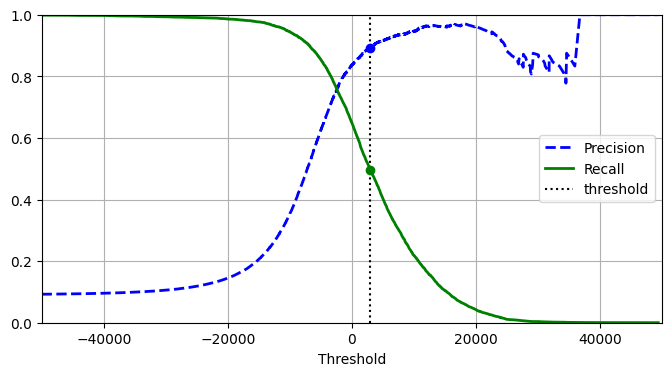

In [28]:
plt.figure(figsize=(8,4))
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)

plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)

plt.vlines(threshold, 0,1.0,"k", "dotted", label="threshold")

idx= (thresholds >=threshold).argmax()
plt.plot(thresholds[idx], precisions[idx],"bo")
plt.plot(thresholds[idx], recalls[idx],"go")
plt.axis([-50000, 50000, 0, 1])
plt.grid()
plt.xlabel("Threshold")
plt.legend(loc="center right")

plt.show()

Another way to select good precision/recall trade-off is to plot precision directly against recall.

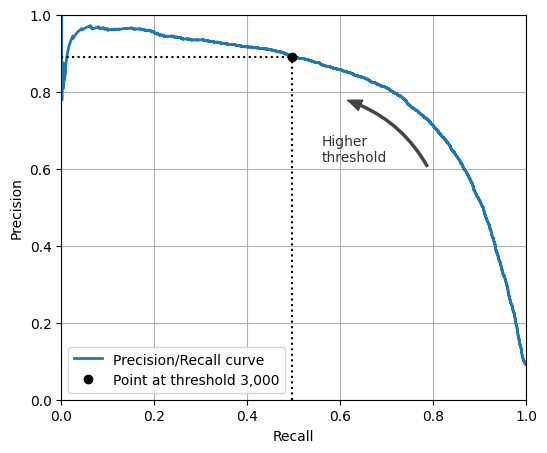

In [29]:
import matplotlib.patches as patches

plt.figure(figsize=(6,5))

plt.plot(recalls, precisions, linewidth=2, label="Precision/Recall curve")

plt.plot([recalls[idx], recalls[idx]],[0., precisions[idx]],"k:")
plt.plot([0.0, recalls[idx]],[precisions[idx],precisions[idx]],"k:")

plt.plot([recalls[idx]],[precisions[idx]],"ko",label="Point at threshold 3,000")
plt.gca().add_patch(patches.FancyArrowPatch((0.79, 0.60),(0.61,0.78),connectionstyle="arc3, rad=.2",
                    arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10", color="#444444"))

plt.text(0.56, 0.62, "Higher\nthreshold", color="#333333")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0,1,0,1])
plt.grid()
plt.legend(loc="lower left")
plt.show()

In [30]:
idx_for_90_precision=(precisions >=0.90).argmax()
threshold_for_90_precision=thresholds[idx_for_90_precision]
threshold_for_90_precision

3370.0194991439557

To make prediction (on the training set for now), instead of calling the classifier's predict() method , can run below code

In [31]:
y_train_pred_90= (y_scores >= threshold_for_90_precision)

In [32]:
#check predictions' precision and recall

precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [33]:
recall_at_90_precision= recall_score(y_train_5, y_train_pred_90)
recall_at_90_precision

0.4799852425751706

now precision classifier is 90% , just set the high enough threshold.

NOTE: high-precision classifier is not very useful if its recall is too low! For many application , 48% recall wouldn't be great at all.

### **The Receiver operating characteristic (ROC) Curve**

- used with binary classifiers
- similar to the precision/recall curve.
- instead plotting precision vs recall, the ROC curve plots the true positive rate(another name of recall) against the false positive rate(FPR).
- FPR also known as fall-out is the ration of negative instances that are incorrctly classified as positive.

- It is equal to 1 - the true negative rate(TNR)

To plot ROC curve, use roc_curve() to compute the TPR and FPR for various threshold values:


In [34]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds=roc_curve(y_train_5,y_scores)

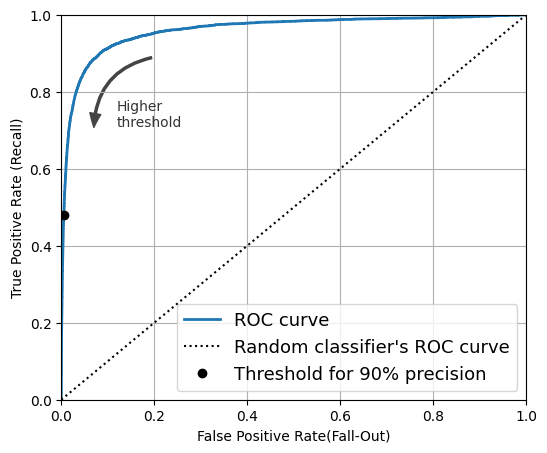

In [35]:
idx_for_threshold_at_90=(thresholds <= threshold_for_90_precision).argmax()
tpr_90, fpr_90= tpr[idx_for_threshold_at_90], fpr[idx_for_threshold_at_90]

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, linewidth=2, label="ROC curve")
plt.plot([0,1],[0,1],'k:', label="Random classifier's ROC curve")
plt.plot([fpr_90],[tpr_90], "ko", label="Threshold for 90% precision")

plt.gca().add_patch(patches.FancyArrowPatch(
    (0.20,0.89),(0.07,0.70),connectionstyle="arc3, rad=.4", arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10", color="#444444"
))

plt.text(0.12,0.71,"Higher\nthreshold",color="#333333")
plt.xlabel("False Positive Rate(Fall-Out)")
plt.ylabel("True Positive Rate (Recall)")
plt.grid()
plt.axis([0,1,0,1])
plt.legend(loc="lower right", fontsize=13)

plt.show()

Once again there is trade-off: the higher the recall(TPR), the more false positives(FPR) the classifier produces. The dotte line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (towards the top left corner)

one way to compare classifiers is to measure the area under the curve(AUC). A perfect classifier will have a ROC AUC equal to 1, wheareas a purely random classifier will have ROC AUC equal to 0.5.

Scikit-Learn provides a function to estimate the ROC AUC:


In [36]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9604938554008616

Use PR curve when the positive class is rare or when weightage is on false positives then false negatives otherwise use ROC curve.

Example:

looking at the previous RO curve (and ROC AUC score) , it looks like classifier is good, but this is mostly because there are few positives(5s) compared to the negatives(non-5s). In contrast , the PR curve makes it clear that the classifier has room for improvement, the curve could really be closer to the top-right corner.

Create a RandomForestClassifier and then compare PR curve and F1 score with SGDClassifier

In [37]:
from sklearn.ensemble import RandomForestClassifier

forest_clf= RandomForestClassifier(random_state=42)

In [38]:
y_probas_forest=cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")

check at the class probabilities for the first two images in the training set:

In [39]:
y_probas_forest[:2]


array([[0.11, 0.89],
       [0.99, 0.01]])

The model predicts that the first image is +ve with 89% probability, and it predicts that the second image is negative with 99% probability. Since each image is either positive or -ve, the probabilities in each row add up to 100%.

In [40]:
#Not in the code

idx_50_to_60=(y_probas_forest[:,1]>0.50) & (y_probas_forest[:,1]<0.60)
print(f"{(y_train_5[idx_50_to_60]).sum()/ idx_50_to_60.sum():.1%}")

94.0%




These are estimated propabilities and not actual.
Example: Image which classified by model as +ve with an estimated probability between 50% and 60%, riughly 94% of them are actually positive. So the model's estimated probabilities were much too low in this case- but model cal be overconfident as well.

sklearn.calibration package contains tool to calibrate the estimated probabilities and make them much closer to actual probabilities.

The second column contains the estimated probabilities for the +ve class, so let's pass them to the precision_recall_curve()

In [41]:
y_scores_forest=y_probas_forest[:,1]
precisions_forest, recalls_forest, thresholds_forest= precision_recall_curve(
    y_train_5, y_scores_forest
)

Now plot the PR curve. It is useful to plot the first PR curve as well to see how they compare.

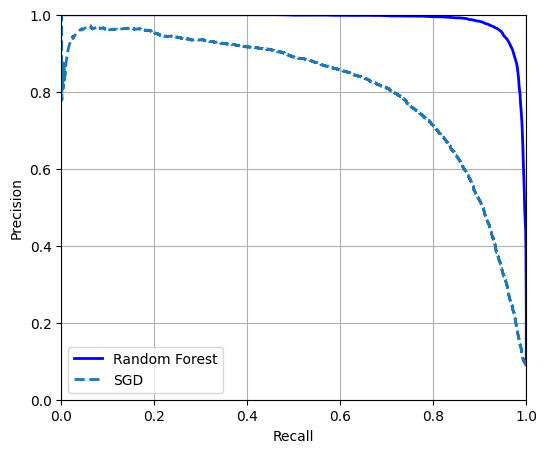

In [42]:
plt.figure(figsize=(6,5))
plt.plot(recalls_forest, precisions_forest, "b-", linewidth=2, label="Random Forest")

plt.plot(recalls, precisions,"--", linewidth=2, label="SGD")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0,1,0,1])
plt.grid()
plt.legend(loc="lower left")
plt.show()

RandomForestClassifier PR curve looks much better than the SGDClassifier. It comes much closer to the top-right corner. It F1 score and ROC AUC score are also significantly better.

In [43]:
y_train_pred_forest=y_probas_forest[:,1] >=0.5 #positive proba >= 50%

f1_score(y_train_5, y_train_pred_forest)



0.9274509803921569

In [44]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

In [45]:
precision_score(y_train_5, y_train_pred_forest)

0.9897468089558485

In [46]:
recall_score(y_train_5, y_train_pred_forest)

0.8725327430363402

Above code explain how to train binary classifier, choose the appropriate metric for task, evaluate classifier using cross-validation, select the precision/recall trade-off that fits to the project needs, and use several metrics and curves to compare various models.

## **Multiclass Classification**

Also known as multinomial classifiers.

`LogisticRegression` , `RandomForestClassifier`, `GaussianNB` are capable of handling multiple classes natively. Other are strictly binary classifiers (eg. SGDClassifier and SVC)

In [47]:
from sklearn.svm import SVC
svm_clf=SVC(random_state=42)
svm_clf.fit(X_train[:2000],y_train[:2000])

SVC(random_state=42)

In [48]:
svm_clf.predict([some_digit])

array(['5'], dtype=object)

To check how SVC used OvO (one vs One) , and based on scores for provided classes (here it made 45 prediction, one per pair of classes) it select the digit.

to check scores for all instance of run use decision_function()

In [49]:
some_digit_scores=svm_clf.decision_function([some_digit])
some_digit_scores.round(2)

array([[ 3.79,  0.73,  6.06,  8.3 , -0.29,  9.3 ,  1.75,  2.77,  7.21,
         4.82]])

in above code it returns 10 scores per instance: one per class. Each class gets a score equal to the number of won duels plus or minus a small tweak(max +- 0.33).

The highest score is 9.3, and its corresponding class is 5

In [50]:
some_digit_scores

array([[ 3.79297828,  0.72949369,  6.06184129,  8.29800527, -0.29383983,
         9.30157597,  1.74723215,  2.77365456,  7.20601456,  4.82245092]])

In [51]:
some_digit_scores.argmax()

5

In [52]:
class_id=some_digit_scores.argmax()
class_id  # this is returning index value of score which is 5

5

In [53]:
# to get a class label.

svm_clf.classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [54]:
svm_clf.classes_[class_id]

'5'

To force Scikit-Learn to use one-vs-one or one-vs-the-rest, can use `OneVsOneClassifier` or `OneVsRestClassifier` classes.

Simply create an instance and pass a classifier to its constructor (it doesn't even have to be a binary classifier).

Example: below code creates a multiclass classifier using the OvR strategy, based on an `SVC`

In [55]:
from sklearn.multiclass import OneVsRestClassifier

ovr_clf= OneVsRestClassifier(SVC(random_state=42))

ovr_clf.fit(X_train[:2000], y_train[:2000])

OneVsRestClassifier(estimator=SVC(random_state=42))

Predict the number of trained class now

In [56]:
ovr_clf.predict([some_digit])

array(['5'], dtype='<U1')

In [57]:
len(ovr_clf.estimators_)

10

Training an `SGDClassifier` on a multiclass dataset and using it to make predictions is just as easy:


In [58]:
sgd_clf=SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

array(['3'], dtype='<U1')

This predicted incorrectly,this time Scikit-Learn used OvR(One Vs Rest) strategy under the hood: since there are 10 classes, it trained 10 binary classifiers. The `decision_function()` method now returns one value per class.

check the scores that the SGD classifier assigned to each class

In [59]:
sgd_clf.decision_function([some_digit]).round()

array([[-31893., -34420.,  -9531.,   1824., -22320.,  -1386., -26189.,
        -16148.,  -4604., -12051.]])

Evaluate the Model

In [60]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.87365, 0.85835, 0.8689 ])

Scale the input to check if accuracy can go above 89.1%

In [61]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled=scaler.fit_transform(X_train.astype("float64"))

cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.8983, 0.891 , 0.9018])

### Error Analysis

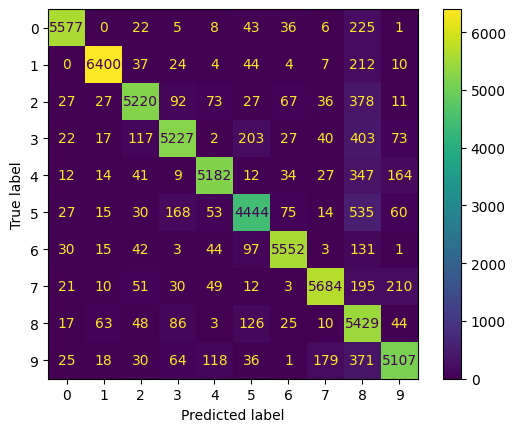

In [64]:
from sklearn.metrics import ConfusionMatrixDisplay

y_train_pred=cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
plt.show()

In Above matrix the row 5 and column 5 (starts with zero) is more darker ,this could be because of classifier made more error on 5s or because there are fewer 5s in dataset, and that motivates to normalize the given dataset, means divide each value by the total number of images in the corresponding (true) class (i.e. divide by the row's sum).

`value_format=".0%"` show %age with no decimal.

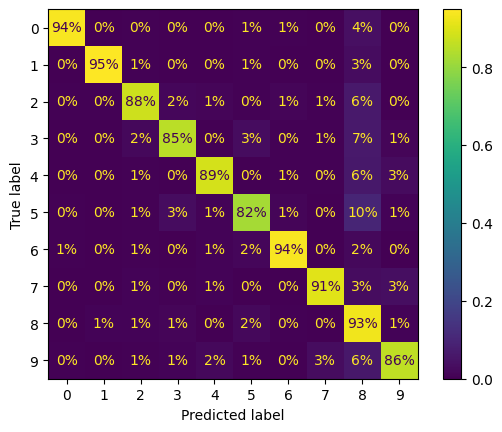

In [66]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, normalize="true", values_format=".0%")
plt.show()

we can now easily see that only only 82% of the images of 5s were classified correctly.

To make more errors stand out, can put zero weight on the correct predictions.

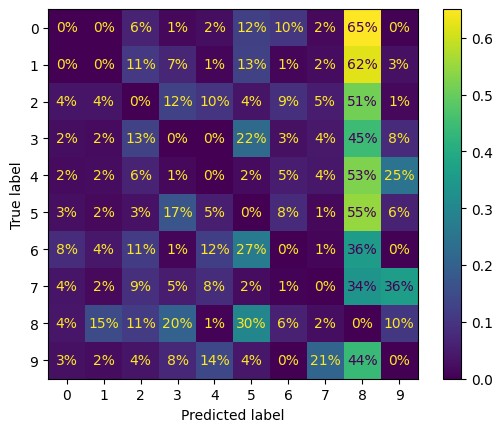

In [68]:
sample_weight=(y_train_pred !=y_train)

ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred,sample_weight=sample_weight,normalize="true", values_format=".0%")
plt.show()

In the above diagram (Error one )the column for class 8 is brighter it means many images got misclassified as 8s.

Interpret the percentage:
We are excluding the correct predictions.

Example:

the 36% in row #7, column #9 does not mean that 36% of all images of 7s were misclassified as 9s. It means that 36% of the errors the model made on images of 7s were misclassifications as 9s.In reality, only 3% of the images of 7s ere misclassified as 9s.

It is possible to normalize the confusion matrix by column rather than by rows: set `normalize="pred"`, it will show the diagram as below.

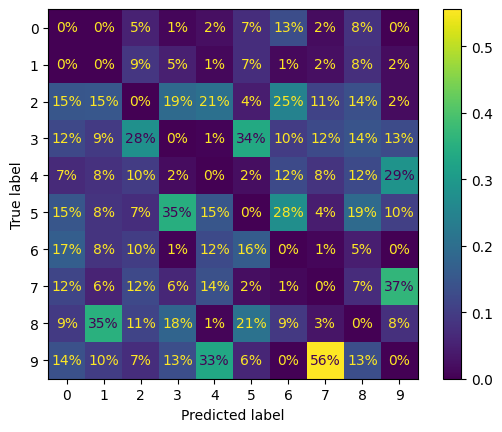

In [70]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred,sample_weight=sample_weight,normalize="pred", values_format=".0%")
plt.show()

In above diagram, 56% of misclassified 7s are actually 9s

Put all plots in a couple of figures for the book

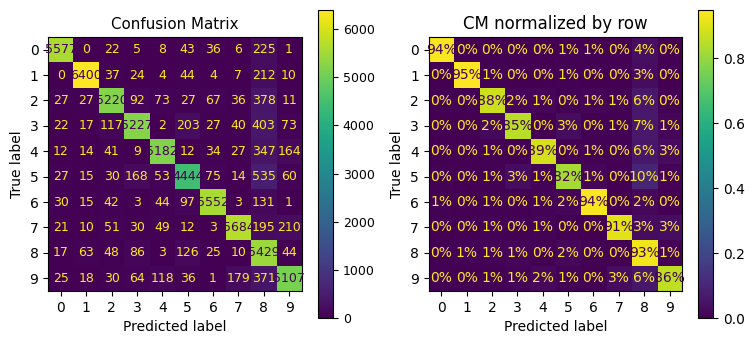

In [71]:
fig, axs= plt.subplots(nrows=1, ncols=2, figsize=(9,4))

plt.rc('font', size=9)
ConfusionMatrixDisplay.from_predictions(y_train,y_train_pred,ax=axs[0])
axs[0].set_title("Confusion Matrix")


plt.rc("font", size=10)
ConfusionMatrixDisplay.from_predictions(y_train,y_train_pred, ax=axs[1], normalize="true", values_format=".0%")
axs[1].set_title("CM normalized by row")

plt.show()

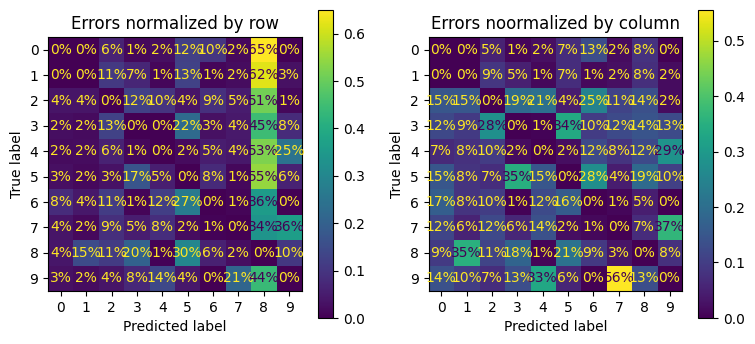

In [72]:
fig,axs=plt.subplots(nrows=1, ncols=2, figsize=(9,4))
plt.rc("font",size=10)

ConfusionMatrixDisplay.from_predictions(y_train,y_train_pred, ax=axs[0], sample_weight=sample_weight, normalize="true", values_format=".0%")
axs[0].set_title( "Errors normalized by row" )

ConfusionMatrixDisplay.from_predictions(y_train,y_train_pred, ax=axs[1], sample_weight=sample_weight, normalize="pred", values_format=".0%")

axs[1].set_title("Errors noormalized by column")

plt.show()

plt.rc('font', size=14)

Analyzing individual errors can also be a good way to gain insight into what your classifier is doing and why it is falling.

In [73]:
cl_a,cl_b='3','5'

X_aa=X_train[(y_train== cl_a) & (y_train_pred==cl_a)]
X_ab=X_train[(y_train== cl_a) & (y_train_pred==cl_b)]
X_ba=X_train[(y_train== cl_b) & (y_train_pred==cl_a)]
X_bb=X_train[(y_train== cl_b) & (y_train_pred==cl_b)]

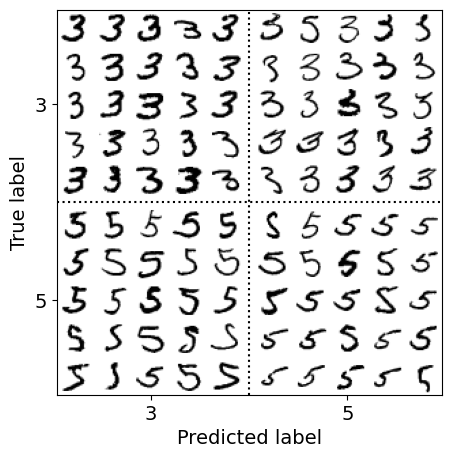

In [78]:
size=5
pad=0.2
plt.figure(figsize=(size, size))

for images, (label_col, label_row) in [(X_ba,(0,0)),(X_bb,(1,0)),(X_aa,(0,1)),(X_ab,(1,1))]:
  for idx, image_data in enumerate(images[:size*size]):
    x= idx % size + label_col * (size+pad)
    y= idx // size + label_row *(size+pad)
    plt.imshow(image_data.reshape(28,28), cmap="binary", extent=(x,x+1, y, y+1))

plt.xticks([size/2, size+pad+size/2],[str(cl_a), str(cl_b)])
plt.yticks([size/2, size+pad+size/2],[str(cl_b), str(cl_a)])

plt.plot([size+pad /2, size+pad/2],[0,2*size+pad],"k:")
plt.plot([0,2 * size + pad],[size + pad/2, size + pad /2],"k:")
plt.axis([0,2*size+pad, 0,2 * size + pad])

plt.xlabel("Predicted label")
plt.ylabel("True label")

plt.show()

### **Multilabel Classification**

Classify output multiple classes for each instances.

In [82]:
y_train_large=(y_train >='7')
y_train_large

array([False, False, False, ..., False, False,  True])

In [83]:
(y_train.astype('int8') %2 ==1)

array([ True, False, False, ...,  True, False, False])

In [84]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [85]:
y_multilabel

array([[False,  True],
       [False, False],
       [False, False],
       ...,
       [False,  True],
       [False, False],
       [ True, False]])

In [79]:
import numpy as np

from sklearn.neighbors import KNeighborsClassifier

y_train_large=(y_train >='7')
y_train_odd=(y_train.astype('int8') %2 ==1)

y_multilabel=np.c_[y_train_large, y_train_odd] #concatinate c_

knn_clf= KNeighborsClassifier()

knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [86]:
knn_clf.predict([some_digit])

array([[False,  True]])

And above is correct as 5 is not large (>7) as per above code, and this is also odd, so True for odd.

Selecting the right metric depends on project. Other way to evaluate multilabel classifier, like F1 score for each individual label (or any other binary classifier metric) then simply compute the average score.

In [87]:
y_train_knn_pred=cross_val_predict(knn_clf, X_train, y_multilabel,cv=3)
f1_score(y_multilabel, y_train_knn_pred, average="macro")

0.976410265560605

The above approach assumes that all labels are equally important, which may not be the case. example, if there are more pictures of Alice than of Bob or Charlie, you may want to give weight to the classifier's score on pictures of Alice. One simple option is to give each label a weight equal to its support(i.e., the number of instances with that target label). To do this simply set averge="weighted" when calling the f_score()

 use classifiers that doesn't natively support multilabel classification, such as SVC, one possible strategy is to train one model per label. However strategy may have hard time capturing the dependencies between the labels.
 Example:
 A large digit(7,8,9) is twice more likely to be odd then even, but the classifier for the "odd" label does not know what the classifier in a chain: when a model makes a prediction, it uses the input features + all the predictions of the models that come before it in the chain.

 In Scikit-Learn has a class called `ChainClassifer` that does the same, bydefault it will use the true labels for training, feeding each model the appropriate labels depends on their position in the chain.. But if set `cv` hyperparameter, it will use cross-vlidation to get "clean" (out-of-sample) predictions.

In [89]:
from sklearn.multioutput import ClassifierChain

chain_clf= ClassifierChain(SVC(), cv=3, random_state=42)
chain_clf.fit(X_train[:2000], y_multilabel[:2000])

ClassifierChain(base_estimator=SVC(), cv=3, random_state=42)

In [90]:
chain_clf.predict([some_digit])

#0 means it is not >7 and 1 means it is odd number (as this is multiclass prediction and it is predecting >7 and odd both)

array([[0., 1.]])

### **Multioutput Classification**

Generalization of Multilabel classification

where each label can be multiclass(i.e, it can have more than two possble values)

Example:

remove noise from image.

can assign one label to each pixel and each label can have multiple values (pixal intensity ranges from 0,255).



In [92]:
# below code to add noise in original image and then get original image back after removing noise.

np.random.seed(42)

noise=np.random.randint(0,100,(len(X_train),784))
X_train_mod=X_train+noise

noise=np.random.randint(0,100,(len(X_test),784))

X_test_mod=X_test+noise
y_train_mod=X_train
y_test_mod=X_test

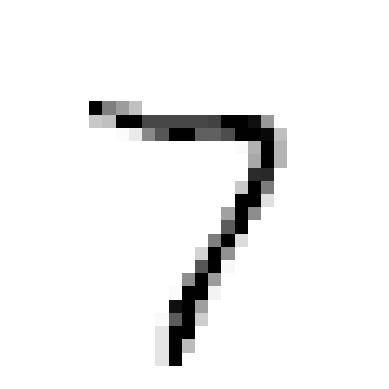

In [93]:
#train the classifier and make it clean up this image

knn_clf=KNeighborsClassifier()
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit= knn_clf.predict([X_test_mod[0]])
plot_digit(clean_digit)
plt.show()